<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 1</h4>
<h4 align="center">If you have any question about homework :
for number 1,4 : @AHY2002 and for questions number 2,3,5 : @Mbnkh10


<h5 align="center"> Mohammad Hossein Shafiezadegan </h5>
<h5 align="center"> 99104781 </h5>

In [1]:
# import required packages
import math

import numpy as np
import cv2 #Install opencv-python by issuing the following command: (pip install opencv-python)
import time
import random
import matplotlib.pyplot as plt

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. LDU decomposition
In linear algebra, LU decomposition factors a matrix ($\textbf{A} :n \times n$) as the product of a lower triangular matrix ($\textbf{L} :n \times n$) and an upper triangular matrix ($\textbf{U} :n \times n$). The product sometimes includes a permutation matrix ($\textbf{P} :n \times n$) as well.
$$ \textbf{PA} = \textbf{LU} $$
We know that the elements on the main diagonal of the $\textbf{U}$ are the pivots. So $\textbf{U}$ can be decomposed into a diagonal matrix ($\textbf{D} :n \times n$) with elements whose pivots are on the main diagonal and a normalized $\textbf{U}$ matrix.
$$ \textbf{PA} = \textbf{LDU} $$
>Complete the function below.<br>
>Note that in this problem, we assume that the elimination process does not require any row permutation.<br>

In [2]:
# Code cell
def E_mat(n,index,A):
    E = np.eye(n)
    E[index[0]][index[1]] = -A[index[0]][index[1]] / A[index[1]][index[1]]

    return E

def LDU_decomposition(A):
    n = len(A)
    U = A
    L = np.eye(n)

    for j in range(n-1):
        for i in range(n-j-1):
            E = E_mat(n,[i+j+1,j],U)
            U = E @ U
            L = L @ np.linalg.inv(E)

    D = np.diag(np.diag(U))
    U /= np.diag(U)[:, None]

    return L, D, U

In [5]:
# This section has been added to observe the performance of the code and see the L, D and U matrices and this is just for test

A = np.array([[2, 4, 5], [1, 3, 2], [4, 2, 1]])
print("A : \n",A)
L,D,U = LDU_decomposition(A)
print("L : \n",L)
print("D : \n",D)
print("U : \n",U)

print(A == L@D@U)

A : 
 [[2 4 5]
 [1 3 2]
 [4 2 1]]
L : 
 [[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [ 2.  -6.   1. ]]
D : 
 [[  2.   0.   0.]
 [  0.   1.   0.]
 [  0.   0. -12.]]
U : 
 [[ 1.   2.   2.5]
 [ 0.   1.  -0.5]
 [-0.  -0.   1. ]]
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [6]:
# Evaluation Cell
n = random.randint(10,50)
A = np.random.randn(n, n)
L,D,U = LDU_decomposition(A.copy())

assert np.linalg.norm(L - np.tril(L)) < 1e-10, "L is not lower triangular"
assert np.linalg.norm(D - np.diag(np.diag(D))) < 1e-10, "D is not diagonal"
assert np.linalg.norm(U - np.triu(U)) < 1e-10, "U is not upper triangular"
assert np.linalg.norm(A - L @ D @ U) < 1e-10, "L and D and U does not satisfy A = LDU"

print('status: successful')

status: successful


## 2. Gauss-Jordan's method for matrix inversion

**Definition** : 
Let $\textbf{A}$ be an $n \times n$ matrix. Its inverse, if it exists, is the $n \times n$ matrix $\textbf{A}^{-1}$ such that

$$ \textbf{AA}^{-1} = \textbf{I} $$

Where $\textbf{I}$ is the $n \times n$ identity matrix. If $\textbf{A}^{-1}$ exists, we say that $\textbf{A}$ is invertible. Not all square matrices are invertible, but you don't need to worry about this issue in this problem.You Should calculate inverse of matrix in Gauss-Jordan method.$\\$
First, form the augmented matrix for the matrix $\textbf{A}$, then triangulate the matrix using the elimination method. In the next step, set the non-zero elements above the pivots to zero, and at the end, divide each row into pivots so that the pivots are equal to one.

In [7]:
# Code cell
def inverse(A):
    
    """
        Computes the inverse of the input matrix
        
        inputs:
            A (numpy ndarray): input matrix
            
        outputs:
            A_inv (numpy ndarray): inverse of the input matrix
    """
    
    n = len(A)
    aug_M = np.concatenate((A, np.eye(n)), axis=1)

    U = aug_M
    for j in range(n-1):
        for i in range(n-j-1):
            E = E_mat(n,[i+j+1,j],U)
            U = E @ U

    for j in range(n-1):
        for i in range(n-j-1):
            E = E_mat(n,[n-2-j-i,n-1-j],U)
            U = E @ U

    result = U[:,n:] / np.diag(U[:,:n])[:, None]
    return result

In [8]:
# This section has been added to observe the performance of the code and see the L, D and U matrices and this is just for test.
A = np.array([[2, 4, 5], [1, 3, 2], [4, 2, 1]])
M = inverse(A)
M2 = np.linalg.inv(A)

assert np.linalg.norm(M2 - M) < 1e-10, "Inverse of matrix has been calculated wrongly!"

print('status: successful')

status: successful


In [11]:
# Evaluation Cell

n = random.randint(10,50)
A = np.random.rand(n, n) + n * np.eye(n, n)
s = time.time()
A_inv = inverse(A.copy())
elapsed = time.time() - s

assert np.linalg.norm(A @ A_inv - np.eye(n, n)) < 1e-10, "A_inv does not satisfy A @ A_inv = I"

print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 0.00525 seconds


## 3. Matrix eliminiation
 
Gaussian elimination is a popular method for solving systems of linear equations. It involves performing a series of row operations on the augmented matrix of the system until it is in row echelon form, and then back-substituting to solve for the unknowns.
The function gauss_elim takes two arguments: the matrix A representing the coefficients of the equations and the columns of matrix A are linearly independent, and the vector b representing the constants on the right-hand side of the equations. It returns the solution vector x.

Here's an example of using the function to solve a system of equations:
$$
A = \left(\begin{array}{cc} 
2 & 1 & -1\\ 
4 & -6 & 0\\ 
-2 & 7 & 2
\end{array}\right)
$$


$$
b = \left(\begin{array}{cc} 
8\\ -2\\7
\end{array}\right)
$$
This will output the solution :
$$
x = \left(\begin{array}{cc} 
-1.0\\ 1.0 \\2.0
\end{array}\right)
$$

In [12]:
# Code cell
def gaussian_elimination(A, b):
    """
        matrix A represents the coefficients of the equations and the columns of matrix A, are linearly independent

        vector b representing the constants

        Gauss elimination algorith in this code is based on matrix form of elimination ( using elimination matrices)

    """

    n = len(A)
    aug_M = np.concatenate((A, b.reshape(-1,1)), axis=1)

    M = aug_M
    for j in range(n-1):
        for i in range(n-j-1):
            E = E_mat(n,[i+j+1,j],M)
            M = E @ M

    x = np.zeros(n)
    U = M[:,:n]
    c = M[:,-1]

    for i in range(n-1,-1,-1):
        x[i] = c[i]
        for j in range(i+1,n):
          x[i] -= U[i,j]*x[j]
        x[i] = x[i]/U[i,i]

    return x


In [13]:
# This is just for test :)

A = np.array([[1,2], [3,4]])
#b = np.array([[1,3]])
b = np.random.randint(100, size=(2))
print(b)
x = gaussian_elimination(A,b)
print(x)

[81 39]
[-123.  102.]


In [14]:
# Evaluation Cell
n = 10
A = np.zeros((10,10))
b = np.random.randint(100, size=(10))
while np.linalg.matrix_rank(A) != n: 
  A = np.random.randint(0,100,(n, n))
s = time.time()
elapsed = time.time() - s
assert np.linalg.norm(A @ gaussian_elimination(A,b) - b) < 1e-7, "A,b does not satisfy x"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 0.0 seconds


## 4. Image Processing
In this section, we are going to get to know the cv2 package.

>Using this package, load and display the image provided to you.

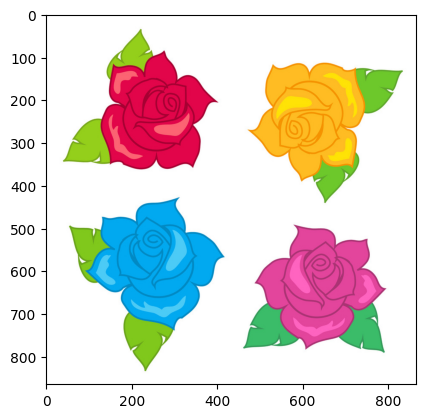

In [15]:
# Code cell
img = cv2.imread("pic.png")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

>Image files store color information in channels. Separate the image channels and save in the following variables and display them.

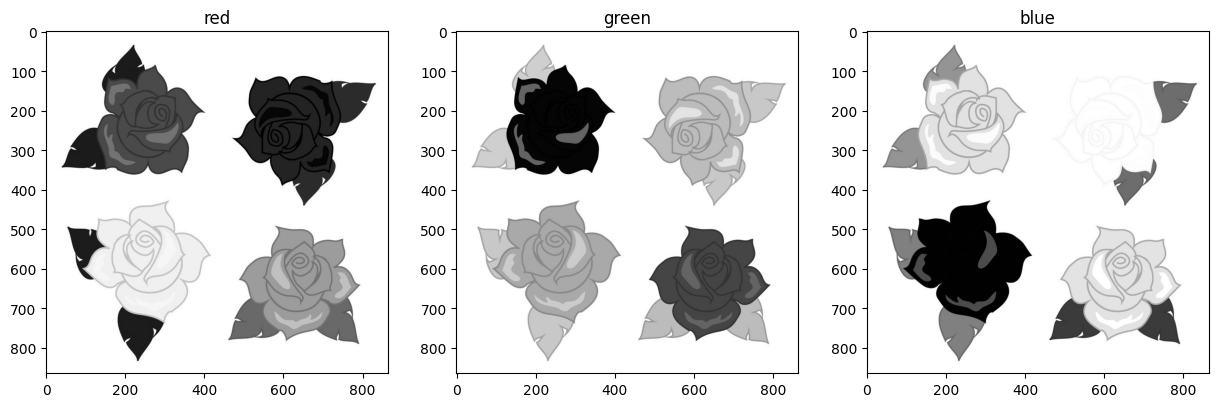

In [16]:
# Code cell

red_ch = img[:,:,0]
green_ch = img[:,:,1]
blue_ch = img[:,:,2]

plt.rcParams ["figure.figsize"] = (15, 5)
plt.subplot(131)
plt.imshow(cv2.cvtColor(red_ch, cv2.COLOR_BGR2RGB))
plt.title('red')
plt.subplot(132)
plt.imshow(cv2.cvtColor(green_ch, cv2.COLOR_BGR2RGB))
plt.title('green')
plt.subplot(133)
plt.imshow(cv2.cvtColor(blue_ch, cv2.COLOR_BGR2RGB))
plt.title('blue')

cv2.namedWindow('Image', cv2.WINDOW_NORMAL)
result = np.concatenate((red_ch,green_ch,blue_ch),axis=1)
cv2.imshow('Image',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

>Now convert your original image from the RGB color space to gray(By using the built-in functions of the cv2 package). Display the resulting image.

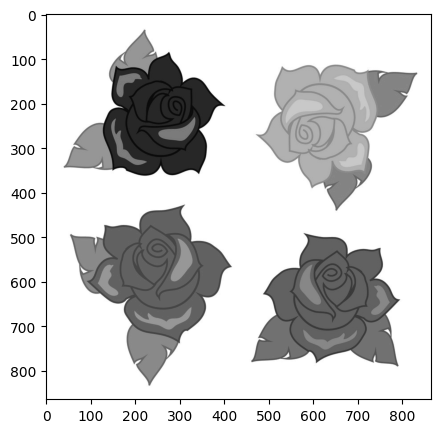

In [17]:
# Code cell
img = cv2.imread("pic.png")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

cv2.namedWindow('Grayscale Image', cv2.WINDOW_NORMAL)
cv2.imshow('Grayscale Image',gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

>Transpose the gray image matrix. what will happen?

**Answer:**
It can be seen that the image will be flipped over the diagonal axis of the image.

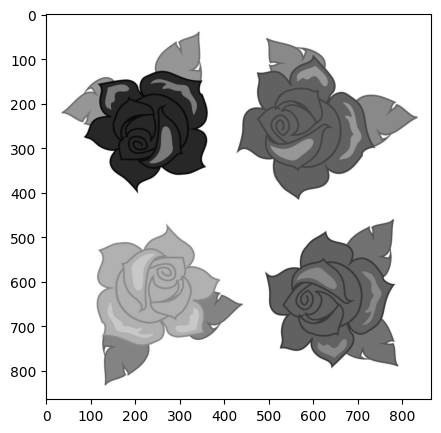

In [18]:
# Code cell
gray_image_T = cv2.transpose(gray_image)
plt.imshow(gray_image_T, cmap="gray")

cv2.namedWindow('Transposed Grayscale Image', cv2.WINDOW_NORMAL)
cv2.imshow('Transposed Grayscale Image',gray_image_T)
cv2.waitKey(0)
cv2.destroyAllWindows()

>In this section, crop the image and display only one of the flowers.

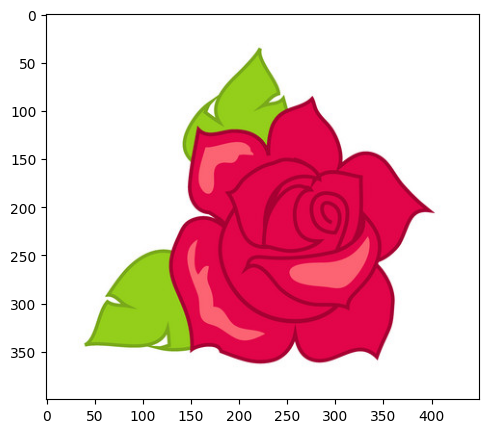

In [19]:
# Code cell
cropped_img = img[0:400,0:450]
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

cv2.namedWindow('Cropped Image', cv2.WINDOW_NORMAL)
cv2.imshow('Cropped Image',cropped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

>Change the place of the red and blue flowers and display the new image.

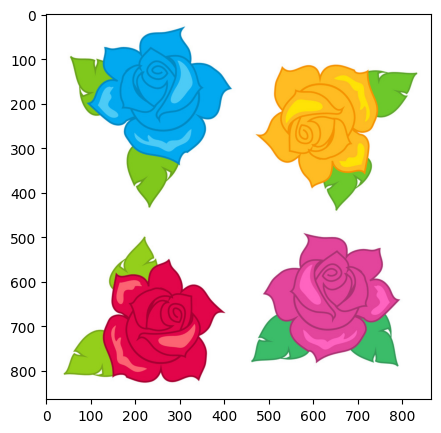

In [20]:
# Code cell
img = cv2.imread("pic.png")
(col, row) = img.shape[0:2]
x_th, y_th = 400, 450
new_img = np.copy(img)
new_img[:,0:y_th,:] = 0
new_img[0:row-x_th,0:y_th,:] = img[x_th:,0:y_th,:]
new_img[row-x_th:,0:y_th,:] = img[0:x_th,0:y_th,:]

plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

cv2.namedWindow('New Image', cv2.WINDOW_NORMAL)
cv2.imshow('New Image',new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

>Make the gray image lighter and darker and observe.

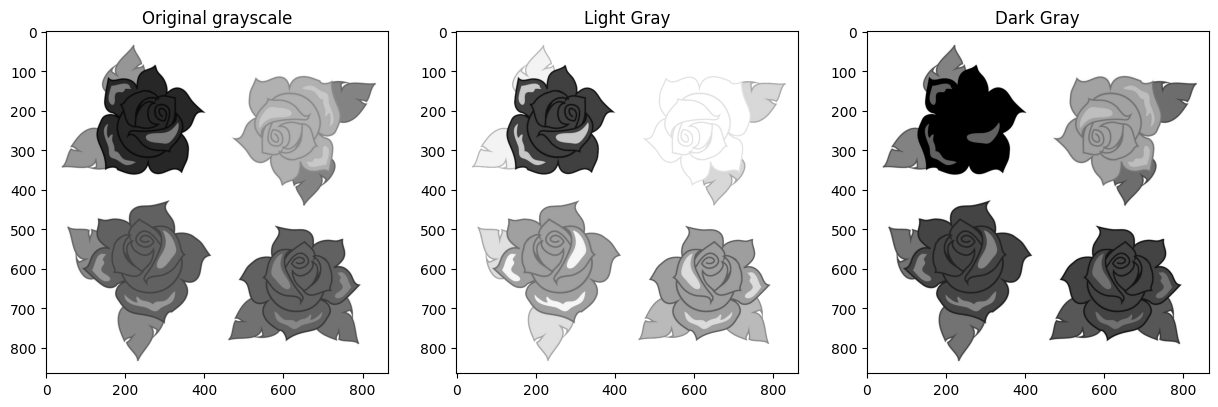

In [21]:
# Code cell
val = 80
dark_gray_img = np.copy(gray_image) - val
light_gray_img = np.copy(gray_image) + val

mask1 = (255 - gray_image) < val # create a mask where addition would cause overflow
mask2 = gray_image < val # create a mask where addition would cause overflow
light_gray_img = np.where (mask1, 255, light_gray_img) # clip values using mask
dark_gray_img = np.where (mask2, 0, dark_gray_img) # clip values using mask

plt.rcParams ["figure.figsize"] = (15, 5)
plt.subplot(131)
plt.imshow(gray_image, cmap="gray")
plt.title("Original grayscale")
plt.subplot(132)
plt.imshow(light_gray_img, cmap="gray")
plt.title('Light Gray')
plt.subplot(133)
plt.imshow(dark_gray_img, cmap="gray")
plt.title('Dark Gray')

cv2.namedWindow('Bightness Change', cv2.WINDOW_NORMAL)
result = np.concatenate((gray_image,light_gray_img,dark_gray_img),axis=1)
cv2.imshow('Bightness Change',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

>There are different ways to create a grayscale image. One of the ways is to replace the RGB values of each pixel with their average. Provide the following matrix elements in such a way that by applying this matrix to each pixel, the mean of R,G,B replaces the values of R,G,B. Then display the grayscaled image of this method.<br>
$$Gray \, Matrix \, = 
\begin{bmatrix}
    g_{11} & g_{12} & g_{13}\\
    g_{21} & g_{22} & g_{23}\\
    g_{31} & g_{32} & g_{33}
\end{bmatrix}
$$

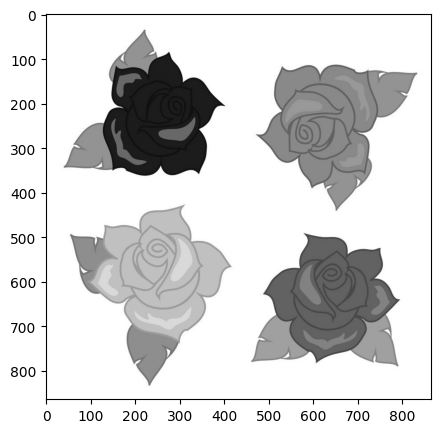

In [22]:
# Code cell
n = [red_ch.shape[0], red_ch.shape[1]]
r = np.reshape(red_ch,-1)
g = np.reshape(green_ch,-1)
b = np.reshape(green_ch,-1)
reshaped_img = np.vstack((r,g,b))

filter = 1/3 * np.ones([3,3])

reshaped_gray_img = filter @ reshaped_img
result = np.zeros_like(img)
result[:,:,0] = np.reshape(reshaped_gray_img[0,:], n)
result[:,:,1] = np.reshape(reshaped_gray_img[1,:], n)
result[:,:,2] = np.reshape(reshaped_gray_img[2,:], n)

plt.imshow(result)

cv2.namedWindow('Gray Image', cv2.WINDOW_NORMAL)
cv2.imshow('Gray Image',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

>Consider the color adjusting filter generated by the matrix : <br>
$$Filter \, Matrix \, = 
\begin{bmatrix}
    0.7 & 0.15 & 0.15\\
    0.15 & 0.7 & 0.15\\
    0.15 & 0.15 & 0.7
\end{bmatrix}
$$
>Apply this filter to each pixel of image and save the result as <font color='orange'> Filt_Img </font>.

True

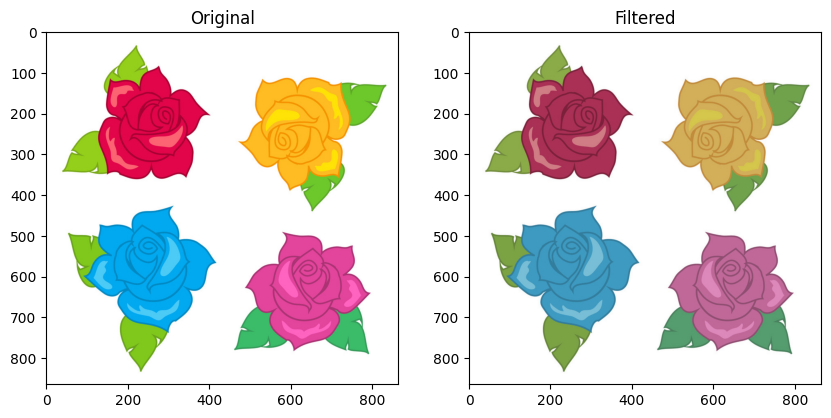

In [23]:
# Code cell
img = cv2.imread ('pic.png') # read color image
filter = np.array ([[0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7]]) # define a filter kernel

n = [img.shape[0], img.shape[1]]
r = np.reshape(img[:,:,0],-1)
g = np.reshape(img[:,:,1],-1)
b = np.reshape(img[:,:,2],-1)
reshaped_img = np.vstack((r,g,b))

reshaped_filtered_img = filter @ reshaped_img
filtered_img = np.zeros_like(img)
filtered_img[:,:,0] = np.reshape(reshaped_filtered_img[0,:], n)
filtered_img[:,:,1] = np.reshape(reshaped_filtered_img[1,:], n)
filtered_img[:,:,2] = np.reshape(reshaped_filtered_img[2,:], n)

plt.rcParams ["figure.figsize"] = (10, 5)
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title('Filtered')

cv2.namedWindow('Filtered Image', cv2.WINDOW_NORMAL)
result = np.concatenate((img,filtered_img),axis=1)
cv2.imshow('Filtered Image',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('filtered_img.png', filtered_img)

>Consider the matrix in the previous step. Is the transformation defined by this matrix invertible?<br>
Which means, can you get the original image colors back once you applied the filter?<br>
If your answer is yes, rebuild the image and display it.

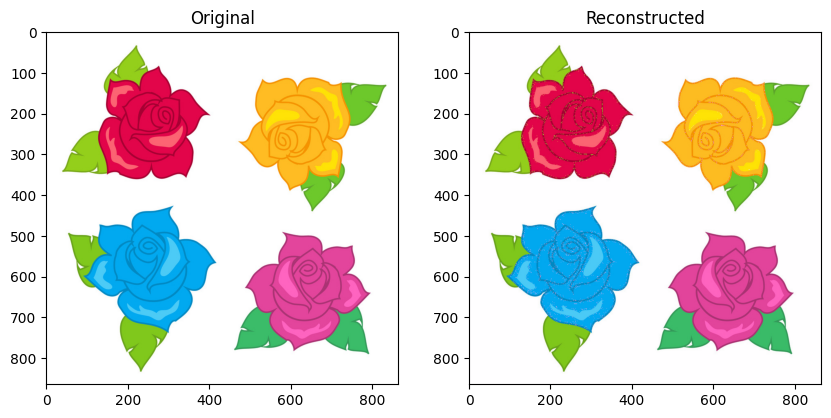

In [24]:
# Code cell
filter = np.array ([[0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7]]) # define a filter kernel
inv_filter = np.linalg.inv(filter)

n = [filtered_img.shape[0], filtered_img.shape[1]]
r = np.reshape(filtered_img[:,:,0],-1)
g = np.reshape(filtered_img[:,:,1],-1)
b = np.reshape(filtered_img[:,:,2],-1)
reshaped_img = np.vstack((r,g,b))

reshaped_filtered_img = inv_filter @ reshaped_img
reconstructed_img = np.zeros_like(filtered_img)
reconstructed_img[:,:,0] = np.reshape(reshaped_filtered_img[0,:], n)
reconstructed_img[:,:,1] = np.reshape(reshaped_filtered_img[1,:], n)
reconstructed_img[:,:,2] = np.reshape(reshaped_filtered_img[2,:], n)

plt.rcParams ["figure.figsize"] = (10, 5)
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.subplot(122)
plt.imshow(cv2.cvtColor(reconstructed_img, cv2.COLOR_BGR2RGB))
plt.title('Reconstructed')

cv2.namedWindow('Reconstructed Image', cv2.WINDOW_NORMAL)
result = np.concatenate((img,reconstructed_img),axis=1)
cv2.imshow('Reconstructed Image',result)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 5. QR factorization(bonus)

$\textbf {Definition}$ All $\textbf{A}_{m\times n}$ matrix have QR factorization where Q is an orthonormal matrix and R is an upper triangular matrix.$$A=QR$$

Using the HH matrix, complete the code cells below to create an algorithm for finding QR factorization of matrix A.

In [25]:
#Code cell
def my_QR(A):
    """
    inputs:
        A (numpy ndarray): input matrix
    outputs:
        Q (numpy ndarray): orthonormal matrix
        R (numpy ndarray): upper triangular matrix
    
    """
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    for j in range(min(n,m)):
        x = R[j:, j]
        normx = np.linalg.norm(x)
        e1 = np.zeros_like(x)
        e1[0] = 1
        v = normx * e1
        if x[0] < 0:
            v = -v
        u = x - v
        if np.linalg.norm(u)>0:
            u = u / np.linalg.norm(u)
        Qj = np.eye(m)
        Qj[j:,j:] = np.eye(m - j) - 2 * (np.outer(u,u))
        R = Qj @ R
        Q = Q @ Qj

    return Q,R

In [26]:
# Just for test :)
#A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]])
m, n = np.random.randint(2, 7), np.random.randint(2, 5)
print("m,n = ", m,n)
A = np.random.randn(m,n)
Q, R = my_QR(A)
Q2, R2 = np.linalg.qr(A,mode='complete')
print("A: \n",A)
print("Q: \n",Q)
print("R: \n",R)
print("Q2: \n",Q2)
print("R2: \n",R2)

m,n =  5 2
A: 
 [[-1.02985195  0.92001715]
 [-1.40967176 -0.9149729 ]
 [ 1.31828782 -0.05997166]
 [ 1.72131505 -0.16483139]
 [-1.17338563  1.1498777 ]]
Q: 
 [[ 0.34091693 -0.4549254  -0.12674252 -0.0928644  -0.80754633]
 [ 0.46665053  0.6695531   0.30899864  0.40346927 -0.27507876]
 [-0.43639926 -0.08195901  0.8424064  -0.17496445 -0.25015456]
 [-0.56981534 -0.05559075 -0.22305228  0.74493108 -0.2598952 ]
 [ 0.38843158 -0.57873476  0.3592427   0.49300495  0.37693207]]
R: 
 [[-3.02082963e+00  4.53420685e-01]
 [-3.78479437e-16 -1.68255798e+00]
 [-1.31158080e-16 -8.67596160e-17]
 [-1.10463607e-16 -6.72843335e-17]
 [-6.09211273e-16  1.74349576e-16]]
Q2: 
 [[-0.34091693  0.4549254   0.32043094  0.4443205  -0.6137767 ]
 [-0.46665053 -0.6695531   0.34152646  0.40353615  0.23335421]
 [ 0.43639926  0.08195901  0.86677203 -0.17592533  0.14350934]
 [ 0.56981534  0.05559075 -0.16748731  0.77729347  0.19995751]
 [-0.38843158  0.57873476  0.03657788  0.06784547  0.71291376]]
R2: 
 [[ 3.02082963 -0.4

In [29]:
# Evaluation Cell
# time and correctness test
numpy_test = {'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}
yours_test = {'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}

num_test = 50
for i in range(num_test):
    m, n = np.random.randint(40, 50), np.random.randint(40, 50)
    A = np.random.randn(m,n)
    # numpy code
    Q, R = np.linalg.qr(A.copy(), mode='complete')
    numpy_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(R,-1)) + np.linalg.norm(np.eye(m) - Q @ Q.T)
    numpy_test['correctness test error'] += np.linalg.norm(A - Q @ R)

     ### To Do ###
    
    my_Q, my_R = my_QR(A.copy())
    yours_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(my_R,-1)) + np.linalg.norm(np.eye(m) - my_Q @ my_Q.T)
    yours_test['correctness test error'] += np.linalg.norm(A - my_Q @ my_R)

for name in numpy_test:
    numpy_test[name] /= num_test
    yours_test[name] /= num_test

yours_check = {'upper-triangular and  orthogonal test error': yours_test['upper-triangular and  orthogonal test error'] <= 1e-5, 
               'correctness test error': yours_test['correctness test error'] <= 1e-5}

print(f'numpy| test ---> {numpy_test}')
print(f'yours| test ---> {yours_test}')
print(f'yours| check ---> {yours_check}')

numpy| test ---> {'upper-triangular and  orthogonal test error': 4.2258018521039384e-15, 'correctness test error': 2.2151649129929656e-14}
yours| test ---> {'upper-triangular and  orthogonal test error': 1.7557791555096374e-14, 'correctness test error': 5.344652093466819e-14}
yours| check ---> {'upper-triangular and  orthogonal test error': True, 'correctness test error': True}
